
Text Analysis of books ...

Last Updated: July 14th, 2025

Daily Challenge : Text Analysis of books using word cloud


👩‍🏫 👩🏿‍🏫 What You’ll learn

    Text preprocessing
    Text Analysis
    Bag of words (BoW) method
    TF-IDF


Important

Create a virtual enviroment to the NLP course and work always on it.


Text preprocessing

For this exercises we will be using NLTK and spaCy

The corpus will be the Lewis Carrol books:

    Alice’s Adventures in Wonderland

    THROUGH THE LOOKING-GLASS And What Alice Found There

    A Tangled Tale


1. Using requests to access the contents online, create a function load_texts().This function should recive a list of urls, load them, clean non-words using regular expressions and append the cleaned text to the corpus that will be returned.

2. Print the first 200 characteres of each text.

Are there parts of the text that are not relevant to the analysis? If so, you need to remove them.

hint: You can use slicing to start and stop the text where you need (ignoring autoral credits in the begining and end) looking for the following phrases:

‘ START’
‘ END’

3. Tokenize the text and print the first 150 tokens of each book

4. Remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

5. Using PorterStemmer(), print the first 50 stemmed tokens

6. Using spaCy pre-trained model ‘en_core_web_sm’ to load and print the first 50 lemmatized tokens. Hint: in spaCy the lemmatized token can be accessed as attribute.

7. Analyse the difference between the stemmed and lemmatized tokens. What is different and why?

8. Using NLTK, identify POS tags od each text.

9. Using NLTK identify all the entities of each text


Analysing the text

1. Using wordcloud and matplotlib, display a word cloud of each book.

The output will look like this (maybe not exactly):



word-cloud

2. Use BoW method to check the five most frequent words in all the books

hint: What will be the best text from the preprocess step? (raw text, stemmed, lemmarized, etc)?

3. Print the BoW and identify the numbers: What is the document number? What is the index and what is how many times the word was found?

4. Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

5. Analyse the outputs: Are those words informative? Are they insightful or expected?



image-3

Solving the frequency problem using TF-IDF

When we create a BoW out from some text, all the words are treated equaly as importants. Like “Alice” or “say” in a fantasy book about Alice. We expected those words to be repeated all over the book, making them not so informative to us.

The solution for this problem would be to consider the frequency relative to the corpus. In this case, if there is a word in a document that doesn’t appears much in the other documents, it is likely meaningful and should be considered more important. And the same way in the oposite: A word that is repeated a lot in all the documents will be considered less important.

That’s the perfect situation to use TF-IDF (Term Frequency-Inverse Document Frequency)

1. Create another BoW, now using TF-IDF as vectorizer.

hint: You need to pass min_df=1, max_df=2 as arguments of the TfidfVectorizer(), because we are using a small dataset.

2. Create again the pie plots with the new 5 most relevant words from each document.


Asset :

    Alice’s Adventures in Wonderland

    THROUGH THE LOOKING-GLASS And What Alice Found There

    A Tangled Tale


In [19]:
import requests
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
import en_core_web_sm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import numpy
import spacy

print("NumPy OK:", numpy.__version__)
nlp = spacy.load("en_core_web_sm")
print("spaCy OK ✅")

NumPy OK: 2.2.6
spaCy OK ✅


Chargement et nettoyage des textes

In [3]:

def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text

        # Observation : Le texte commence par un en-tête (droit d’auteur, etc.)
        # Rechercher les délimiteurs START et END pour ne garder que le corps utile.
        start = re.search(r'\*\*\* START OF.+?\*\*\*', text, re.IGNORECASE)
        end = re.search(r'\*\*\* END OF.+?\*\*\*', text, re.IGNORECASE)
        
        if start and end:
            clean_text = text[start.end():end.start()]
        else:
            clean_text = text

        # Nettoyage : on garde les mots et les espaces
        clean_text = re.sub(r'[^A-Za-z\s]', ' ', clean_text)
        clean_text = re.sub(r'\s+', ' ', clean_text).strip()
        corpus.append(clean_text)
    return corpus

On cherche à extraire les textes depuis des URLs.

Nettoyage basique : on garde uniquement les mots.

Le corpus est une liste de textes propres, un par livre.

In [4]:
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]

corpus = load_texts(urls)

In [5]:
for i, text in enumerate(corpus):
    print(f"\nLivre {i+1} (200 premiers caractères)")
    print(text[:200])


Livre 1 (200 premiers caractères)
Illustration Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the Rabbit Hole CHAPTER II The Pool of Tears CHAPTER III A Caucus Race and a Long 

Livre 2 (200 premiers caractères)
Illustration THROUGH THE LOOKING GLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arranged before commencement of game WHITE RED PIECES PAWNS PAWNS P

Livre 3 (200 premiers caractères)
Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at https www pgdp net Music transcribed by Linda Cantoni Transcriber s note Minor punctuation errors have 


Une attention est portée sur les débuts et fins des fichiers qui contiennent souvent des métadonnées, non pertinentes pour l’analyse. Le code les isole via les marqueurs *** START OF et *** END OF.

In [6]:

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to c:\Users\mathi\Downloads\GenA
[nltk_data]     I\GenAI_Bootcamp\tf_env_310\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to c:\Users\mathi\Downloads\
[nltk_data]     GenAI\GenAI_Bootcamp\tf_env_310\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [7]:


text = "Alice was beginning to get very tired of sitting by her sister."
tokens = word_tokenize(text)
print(tokens)

['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', '.']


In [8]:
nltk.download('punkt')

tokenized_corpus = [word_tokenize(text.lower()) for text in corpus]

for i, tokens in enumerate(tokenized_corpus):
    print(f"\n--- Livre {i+1} (150 premiers tokens) ---")
    print(tokens[:150])

[nltk_data] Downloading package punkt to c:\Users\mathi\Downloads\GenA
[nltk_data]     I\GenAI_Bootcamp\tf_env_310\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



--- Livre 1 (150 premiers tokens) ---
['illustration', 'alice', 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucus', 'race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'tea', 'party', 'chapter', 'viii', 'the', 'queen', 's', 'croquet', 'ground', 'chapter', 'ix', 'the', 'mock', 'turtle', 's', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alice', 's', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of'

In [9]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_corpus = []

for tokens in tokenized_corpus:
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
    filtered_corpus.append(filtered)

# Observation : on vérifie que les mots comme "i", "me", "my" sont bien absents
print("\nVérification : présence de stopwords ?")
for word in ['i', 'me', 'my', 'we', 'ourselves']:
    counts = [tokens.count(word) for tokens in filtered_corpus]
    print(f"{word}: {counts}")

[nltk_data] Downloading package stopwords to c:\Users\mathi\Downloads\
[nltk_data]     GenAI\GenAI_Bootcamp\tf_env_310\nltk_data...



Vérification : présence de stopwords ?
i: [0, 0, 0]
me: [0, 0, 0]
my: [0, 0, 0]
we: [0, 0, 0]
ourselves: [0, 0, 0]


[nltk_data]   Unzipping corpora\stopwords.zip.


In [10]:
stemmer = PorterStemmer()
stemmed_corpus = []

for tokens in filtered_corpus:
    stems = [stemmer.stem(word) for word in tokens]
    stemmed_corpus.append(stems)

print("\n--- Premiers 50 stems du livre 1 ---")
print(stemmed_corpus[0][:50])


--- Premiers 50 stems du livre 1 ---
['illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucu', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'parti', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix', 'mock']


In [11]:
# Charger le modèle spaCy
nlp = en_core_web_sm.load()

lemmatized_corpus = []

for tokens in filtered_corpus:
    doc = nlp(" ".join(tokens))
    lemmatized = [token.lemma_ for token in doc]
    lemmatized_corpus.append(lemmatized)

print("\n--- Premiers 50 lemmes du livre 1 ---")
print(lemmatized_corpus[0][:50])


--- Premiers 50 lemmes du livre 1 ---
['illustration', 'alice', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucus', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'party', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix', 'mock']


Le stemming coupe les mots à leurs racines sans contexte. Par exemple “running”, “runner”, “runs” deviennent “run”.
La lemmatisation (via spaCy) retourne des formes plus grammaticalement correctes, adaptées au contexte (ex : “was” → “be”).

In [12]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to c:\U
[nltk_data]     sers\mathi\Downloads\GenAI\GenAI_Bootcamp\tf_env_310\n
[nltk_data]     ltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [13]:
# On tague uniquement un petit extrait pour chaque livre
for i, tokens in enumerate(filtered_corpus):
    tagged = pos_tag(tokens[:50])
    print(f"\n--- POS Tags du livre {i+1} ---")
    print(tagged)


--- POS Tags du livre 1 ---
[('illustration', 'NN'), ('alice', 'NN'), ('adventures', 'NNS'), ('wonderland', 'VBP'), ('lewis', 'JJ'), ('carroll', 'NN'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('contents', 'NNS'), ('chapter', 'NN'), ('rabbit', 'NN'), ('hole', 'JJ'), ('chapter', 'NN'), ('ii', 'NN'), ('pool', 'NN'), ('tears', 'NNS'), ('chapter', 'NN'), ('iii', 'VBP'), ('caucus', 'NN'), ('race', 'NN'), ('long', 'JJ'), ('tale', 'JJ'), ('chapter', 'NN'), ('iv', 'NN'), ('rabbit', 'NN'), ('sends', 'VBZ'), ('little', 'JJ'), ('bill', 'NN'), ('chapter', 'NN'), ('v', 'NN'), ('advice', 'NN'), ('caterpillar', 'JJ'), ('chapter', 'NN'), ('vi', 'NN'), ('pig', 'NN'), ('pepper', 'IN'), ('chapter', 'NN'), ('vii', 'NN'), ('mad', 'JJ'), ('tea', 'NN'), ('party', 'NN'), ('chapter', 'NN'), ('viii', 'NN'), ('queen', 'JJ'), ('croquet', 'NN'), ('ground', 'NN'), ('chapter', 'NN'), ('ix', 'NN'), ('mock', 'NN')]

--- POS Tags du livre 2 ---
[('illustration', 'NN'), ('looking', 'VBG'), ('glass', 

In [14]:
for i, tokens in enumerate(filtered_corpus):
    doc = nlp(" ".join(tokens[:1000]))  # éviter surcharge mémoire
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"\n--- Entités du livre {i+1} ---")
    print(entities[:20])


--- Entités du livre 1 ---
[('chapter ii', 'LAW'), ('chapter iii', 'LAW'), ('chapter v advice caterpillar', 'LAW'), ('chapter vii', 'PERSON'), ('quadrille', 'ORG'), ('chapter xi stole', 'PERSON'), ('chapter xii', 'LAW'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('four thousand miles', 'QUANTITY'), ('one', 'CARDINAL'), ('new zealand', 'GPE'), ('australia', 'GPE'), ('three', 'CARDINAL'), ('golden key alice', 'FAC'), ('first', 'ORDINAL'), ('one', 'CARDINAL'), ('second', 'ORDINAL'), ('half', 'CARDINAL'), ('tart custard pine apple', 'PERSON')]

--- Entités du livre 2 ---
[('tweedledee daisy daisy', 'PERSON'), ('w king', 'PERSON'), ('knight tweedledum', 'PERSON'), ('daisy daisy lion red illustration chessboard', 'PERSON'), ('eleven', 'CARDINAL'), ('tweedledee w', 'PERSON'), ('shop river', 'ORG'), ('w q k', 'PERSON'), ('kt k nd ch w kt', 'PERSON'), ('kt w kt k', 'PERSON'), ('thou', 'GPE'), ('summer days', 'DATE'), ('chapter ii', 'LAW'), ('chapter iii', 'LAW'), ('chapter vii lion unicorn cha

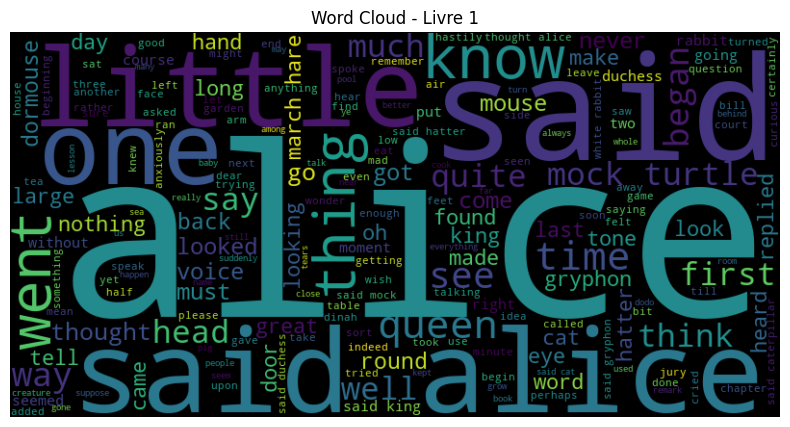

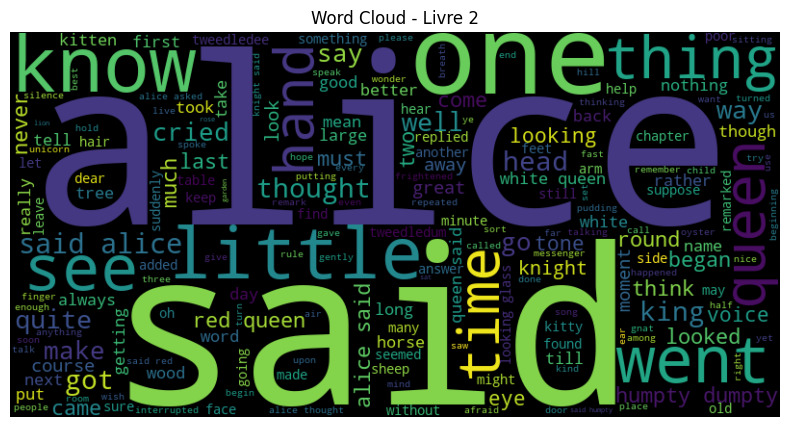

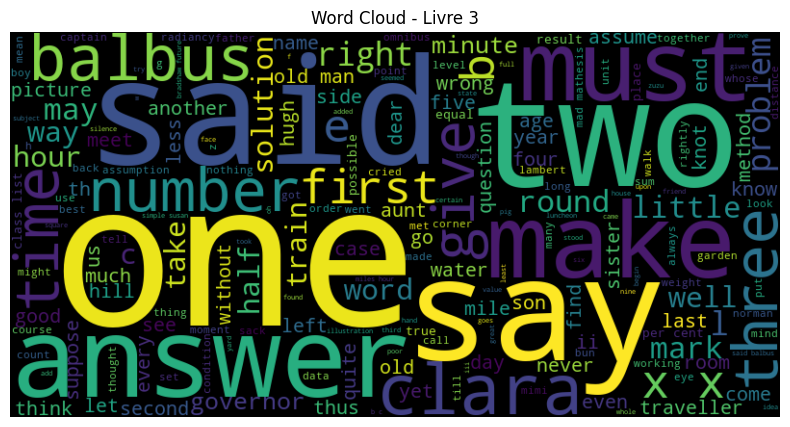

In [15]:
for i, tokens in enumerate(filtered_corpus):
    wc = WordCloud(width=800, height=400).generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - Livre {i+1}")
    plt.show()

In [16]:
vectorizer = CountVectorizer()
texts_joined = [" ".join(tokens) for tokens in filtered_corpus]
X = vectorizer.fit_transform(texts_joined)

# Afficher les 5 mots les plus fréquents
import numpy as np

sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

top5 = sorted_words[:5]
print("\nTop 5 mots les plus fréquents :")
print(top5)


Top 5 mots les plus fréquents :
[('said', np.int64(1069)), ('alice', np.int64(871)), ('one', np.int64(466)), ('little', np.int64(295)), ('queen', np.int64(274))]


In [17]:
vectorizer = CountVectorizer()
texts_joined = [" ".join(tokens) for tokens in filtered_corpus]
X = vectorizer.fit_transform(texts_joined)

# Afficher les 5 mots les plus fréquents
import numpy as np

sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

top5 = sorted_words[:5]
print("\nTop 5 mots les plus fréquents :")
print(top5)


Top 5 mots les plus fréquents :
[('said', np.int64(1069)), ('alice', np.int64(871)), ('one', np.int64(466)), ('little', np.int64(295)), ('queen', np.int64(274))]


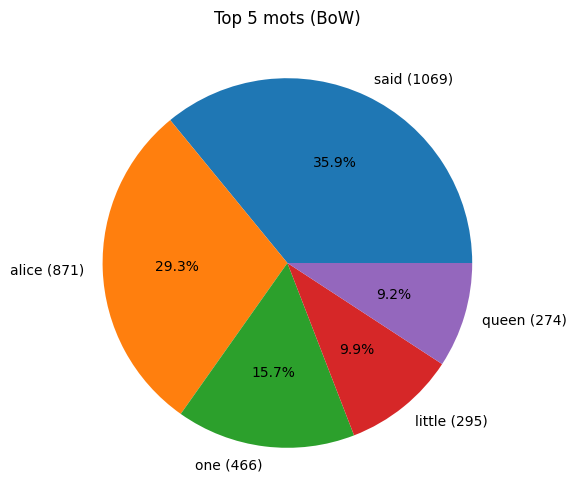

In [18]:
labels = [word for word, freq in top5]
sizes = [freq for word, freq in top5]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=[f"{l} ({s})" for l, s in zip(labels, sizes)], autopct="%1.1f%%")
plt.title("Top 5 mots (BoW)")
plt.show()

In [20]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_joined)

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
indices = tfidf_scores.argsort()[::-1][:5]

top_tfidf_words = [(tfidf_vectorizer.get_feature_names_out()[i], tfidf_scores[i]) for i in indices]

print("\nTop 5 mots (TF-IDF) :")
print(top_tfidf_words)


Top 5 mots (TF-IDF) :
[('humpty', np.float64(0.11672766953972852)), ('dumpty', np.float64(0.11672766953972852)), ('gryphon', np.float64(0.10984425958733895)), ('rabbit', np.float64(0.10584992287507207)), ('balbus', np.float64(0.1052948941830973))]


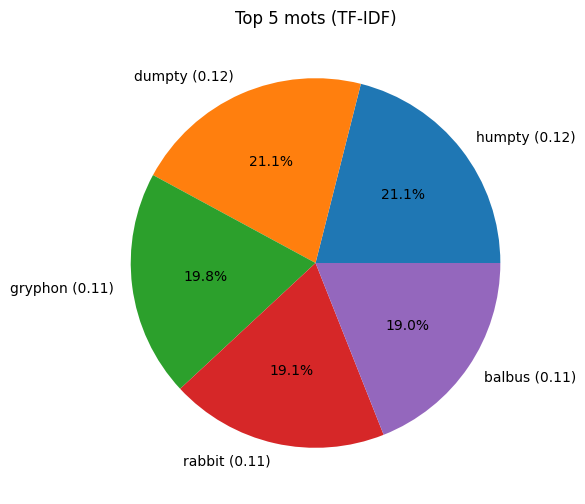

In [21]:
labels = [word for word, score in top_tfidf_words]
sizes = [score for word, score in top_tfidf_words]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=[f"{l} ({s:.2f})" for l, s in zip(labels, sizes)], autopct="%1.1f%%")
plt.title("Top 5 mots (TF-IDF)")
plt.show()

BoW révèle les mots fréquents, mais pas forcément informatifs.

TF-IDF corrige cela en ajustant la fréquence par document.

Stemming vs Lemmatization montre la finesse contextuelle du NLP moderne.

WordCloud + Pie Charts : exploration visuelle efficace.